<a href="https://colab.research.google.com/github/dvoils/neural-network-experiments/blob/main/ion_channels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ion Channels

The classic **Hodgkin-Huxley (HH) model** describes spike generation in the squid giant axon using **sodium** and **potassium** channels. In that model:

* A brief influx of **sodium ions** triggers the action potential (spike).
* An efflux of **potassium ions** follows, repolarizing the membrane.

This basic mechanism (fast Na$^+$ influx followed by K$^+$ efflux) underlies spike generation across many organisms.

However, **cortical neurons** in vertebrates have **many more types of ion channels**, leading to more diverse and complex electrophysiological behavior.

## Membrane Potential

The following describes the dynamics of membrane potential $u(t)$:

$$
C \frac{d}{dt} u(t) = I_{syn}(t) + \sum_k I_k(t)
$$

where:

* $C$ is membrane capacitance.
* $I_{syn}(t)$ is the synaptic input current (current from synapses).
* $I_k(t)$ are currents from various ion channels.

In essence, this equation says: the rate of change of membrane voltage depends on the net current flowing into the neuron.

## Ionic Current

The ionic current through a specific channel $k$ is:

$$
I_k = \bar{g}_k m^{p_k} h^{q_k} (u - E_k)
$$

where:

* $\bar{g}_k$ is the maximum conductance of the channel.
* $m$ and $h$ are gating variables representing activation and inactivation.
* $p_k$ and $q_k$ are exponents describing how the gating variables contribute to channel conductance (typically from empirical fits).
* $E_k$ is the reversal potential (where there is no net current flow).

In the original HH model, for potassium, typically $p_k = 4$ and $q_k = 0$, meaning inactivation ($h$) is omitted.

While the HH model is a solid foundation (with two channel types), real neurons have **many different channels**.



# Figures — Gating Variables and Time Constants of Ion Currents

## Overview

This figure compares the voltage-dependent activation/inactivation properties of three ion currents commonly found in neurons:

| Panel | Current Type              | Symbol           | Description                                  |
| ----- | ------------------------- | ---------------- | -------------------------------------------- |
| A     | Persistent Sodium Current | $I_{\text{NaP}}$ | Non-inactivating sodium current              |
| B     | Transient Sodium Current  | $I_{\text{Na}}$  | Classic fast spiking Na$^+$ current          |
| C     | T-type Calcium Current    | $I_T$            | Low-threshold, transient Ca$^{{2+}}$ current |

Each row contains two subplots:

* **Left:** Steady-state gating variables $m_\infty(u)$ and $h_\infty(u)$
* **Right:** Corresponding time constants $\tau_m(u)$ and $\tau_h(u)$

## Gating Variable Definitions

The gating variables follow standard Hodgkin-Huxley formulations:

* **Steady-state value:**

  $$
  x_\infty(u) = \frac{\alpha_x(u)}{\alpha_x(u) + \beta_x(u)}
  $$

* **Time constant:**

  $$
  \tau_x(u) = \frac{1}{\alpha_x(u) + \beta_x(u)}
  $$

> These apply to both activation ($m$) and inactivation ($h$) gates.

## Physiological Implications

| Current          | Key Properties                                                                                     |
| ---------------- | -------------------------------------------------------------------------------------------------- |
| $I_{\text{NaP}}$ | Persistent activation, **no inactivation**. Enhances excitability during sustained depolarization. |
| $I_{\text{Na}}$  | Fast activation + slower inactivation. Responsible for the **action potential upstroke**.          |
| $I_T$            | Activates at more **negative (low) voltages**, enables **bursting** or **rebound spikes**.         |

## Figure Layout Summary

| Panel | Left Plot                    | Right Plot (Y-axis = ms)            |
| ----- | ---------------------------- | ----------------------------------- |
| A     | $m_\infty(u)$                | $\tau_m(u)$                         |
| B     | $m_\infty(u)$, $h_\infty(u)$ | $\tau_m(u)$, $0.1 \times \tau_h(u)$ |
| C     | $m_\infty(u)$, $h_\infty(u)$ | $\tau_m(u)$, $0.1 \times \tau_h(u)$ |


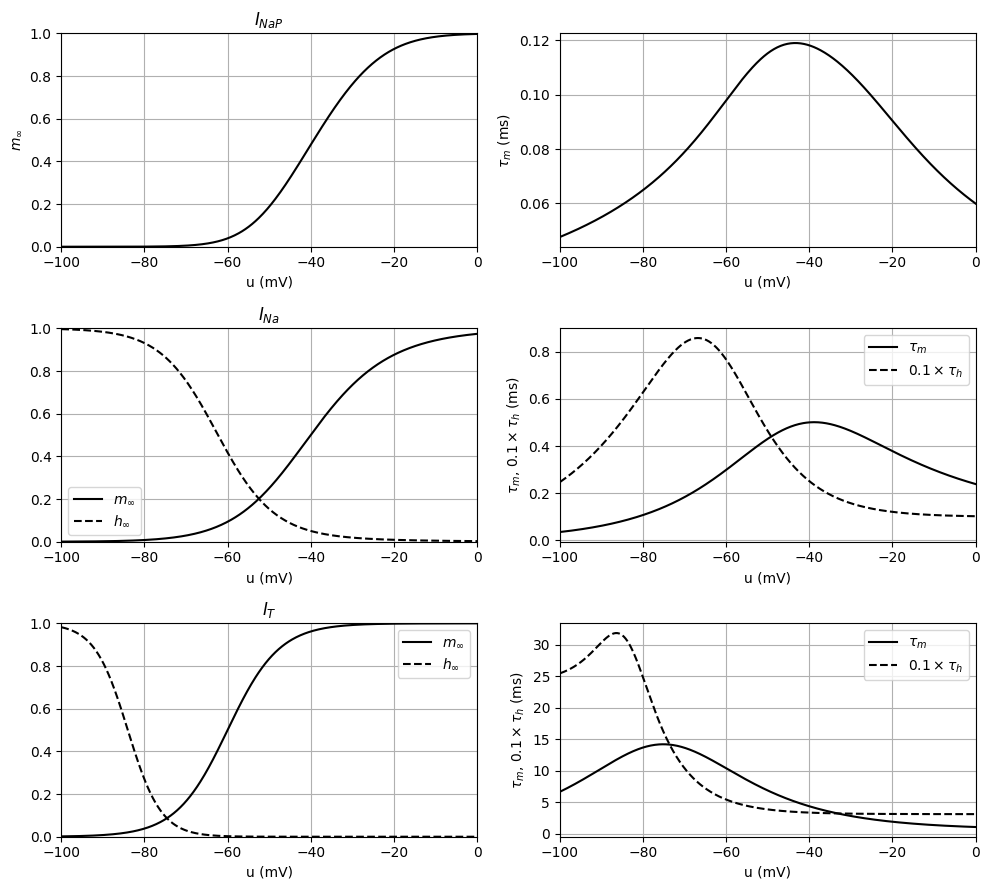

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

u = np.linspace(-100, 0, 500)  # mV

# --------------------------------------------------------------------
# A. Persistent Na+ current (INaP): activation only

def alpha_m_NaP(v):  # unit: 1/ms
    return 0.32 * (v + 52) / (1 - np.exp(-(v + 52) / 4))  # classic form

def beta_m_NaP(v):
    return 0.28 * (v + 25) / (np.exp((v + 25) / 5) - 1)

def m_inf_NaP(v):
    return alpha_m_NaP(v) / (alpha_m_NaP(v) + beta_m_NaP(v))

def tau_m_NaP(v):
    return 1 / (alpha_m_NaP(v) + beta_m_NaP(v))

# --------------------------------------------------------------------
# B. Transient Na+ current (INa): activation & inactivation

def alpha_m_Na(v):
    return 0.1 * (v + 40) / (1 - np.exp(-(v + 40) / 10))

def beta_m_Na(v):
    return 4.0 * np.exp(-(v + 65) / 18)

def alpha_h_Na(v):
    return 0.07 * np.exp(-(v + 65) / 20)

def beta_h_Na(v):
    return 1 / (1 + np.exp(-(v + 35) / 10))

def m_inf_Na(v):
    return alpha_m_Na(v) / (alpha_m_Na(v) + beta_m_Na(v))

def h_inf_Na(v):
    return alpha_h_Na(v) / (alpha_h_Na(v) + beta_h_Na(v))

def tau_m_Na(v):
    return 1 / (alpha_m_Na(v) + beta_m_Na(v))

def tau_h_Na(v):
    return 1 / (alpha_h_Na(v) + beta_h_Na(v))

# --------------------------------------------------------------------
# C. T-type Ca2+ current (IT)

def m_inf_T(v):
    return 1 / (1 + np.exp(-(v + 60) / 6.2))

def h_inf_T(v):
    return 1 / (1 + np.exp((v + 84) / 4))

def tau_m_T(v):
    return 1 / (np.exp(-(v + 131) / 16.7) + np.exp((v + 15.8) / 18.2)) + 0.612

def tau_h_T(v):
    return 30.8 + (211.4 + np.exp((v + 113.2) / 5)) / (1 + np.exp((v + 84) / 3.2))

# --------------------------------------------------------------------
# Plotting

fig, axs = plt.subplots(3, 2, figsize=(10, 9))
axs = axs.flatten()

# A. INaP
axs[0].plot(u, m_inf_NaP(u), label=r'$m_\infty$', color='black')
axs[0].set_title(r'$I_{NaP}$')
axs[0].set_ylabel(r'$m_\infty$')
axs[0].set_xlim(-100, 0)
axs[0].set_ylim(0, 1)

axs[1].plot(u, tau_m_NaP(u), label=r'$\tau_m$', color='black')
axs[1].set_ylabel(r'$\tau_m$ (ms)')
axs[1].set_xlim(-100, 0)

# B. INa
axs[2].plot(u, m_inf_Na(u), label=r'$m_\infty$', color='black')
axs[2].plot(u, h_inf_Na(u), label=r'$h_\infty$', linestyle='dashed', color='black')
axs[2].set_title(r'$I_{Na}$')
axs[2].legend()
axs[2].set_xlim(-100, 0)
axs[2].set_ylim(0, 1)

# B. INa (time constants with scaled tau_h)
axs[3].plot(u, tau_m_Na(u), label=r'$\tau_m$', color='black')
axs[3].plot(u, 0.1 * tau_h_Na(u), label=r'$0.1 \times \tau_h$', linestyle='dashed', color='black')
axs[3].legend()
axs[3].set_ylabel(r'$\tau_m$, $0.1 \times \tau_h$ (ms)')
axs[3].set_xlabel(r'$u$ (mV)')
axs[3].set_xlim(-100, 0)

# C. IT
axs[4].plot(u, m_inf_T(u), label=r'$m_\infty$', color='black')
axs[4].plot(u, h_inf_T(u), label=r'$h_\infty$', linestyle='dashed', color='black')
axs[4].set_title(r'$I_T$')
axs[4].legend()
axs[4].set_xlim(-100, 0)
axs[4].set_ylim(0, 1)

# C. IT (time constants with scaled tau_h)
axs[5].plot(u, tau_m_T(u), label=r'$\tau_m$', color='black')
axs[5].plot(u, 0.1 * tau_h_T(u), label=r'$0.1 \times \tau_h$', linestyle='dashed', color='black')
axs[5].set_ylabel(r'$\tau_m$, $0.1 \times \tau_h$ (ms)')
axs[5].set_xlabel(r'$u$ (mV)')
axs[5].legend()
axs[5].set_xlim(-100, 0)

# Format
for ax in axs:
    ax.set_xlabel('u (mV)')
    ax.grid(True)

plt.tight_layout()
plt.show()


# Potasium Channels


## Ion Channel Dynamics (Potassium Currents)

Each plot shows either **steady-state gating variables** (left column) or **voltage-dependent time constants** (right column) for:

* **Panel A:** $I_{A1}, I_{A2}$ — Rapidly inactivating potassium currents
* **Panel B:** $I_{K2a}, I_{K2b}$ — Slowly inactivating potassium currents

## Current Models

Each current is modeled in the general form:

$$
I_X = \bar{g}_X \, m^p \, h^q \, (u - E_K)
$$

Where:

* $m$: activation variable
* $h$: inactivation variable
* $\tau_m, \tau_h$: time constants for gating kinetics
* $E_K$: potassium reversal potential

In the context of these plots:

* **Solid line:** $m_\infty(u)$ – activation
* **Dashed line:** $h_\infty(u)$ – inactivation

## **Top Row – $I_{A1}, I_{A2}$ (Fast Inactivating K$^+$)**

* **Left plot (steady-state values):**

  * $m_\infty(u)$: increases with voltage
  * $h_\infty(u)$: decreases with voltage
* **Right plot (time constants):**

  * Both $\tau_m$ and $\tau_h$ vary with voltage
  * Rescaled: $0.1 \times \tau_h$ to fit same plot
  * Timescale is short (ms range)
  * $I_A$ is **fast and transient**, helping regulate early spike repolarization

## **Bottom Row – $I_{K2a}, I_{K2b}$ (Slow Inactivating K$^+$)**

* **Left plot:**

  * Again, $m_\infty(u)$ increases, $h_\infty(u)$ decreases
* **Right plot:**

  * Very slow inactivation ($\tau_h$) — see the note that it's plotted as $0.01 \times \tau_h$
  * Full scale suggests $\tau_h \sim 200\text{–}2000 \, \text{ms}$

These potassium currents are critical for:

* **Long-term adaptation**
* **Slow repolarization**
* **Burst termination** in thalamic relay neurons

## Summary

* These potassium currents are **diverse**:

  * $I_A$: Fast, transient, repolarizing current
  * $I_{K2}$: Slower, contributes to delayed repolarization or long-term modulation

* Subtypes exist:

  * $I_{A1}, I_{A2}$
  * $I_{K2a}, I_{K2b}$
  * Differ in their exact voltage/time dependence

* **Inactivation time scales differ dramatically**:

  * $\tau_h$ of $I_A$: \~10 ms
  * $\tau_h$ of $I_{K2}$: \~200–2000 ms

## Physiological Insight

This diversity allows neurons to finely **tune excitability**, **control spiking**, and **adjust firing frequency**:

* **Fast inactivating K$^+$** channels help prevent **repetitive firing**
* **Slow inactivating K$^+$** channels regulate **burst firing** and **longer-term inhibition**


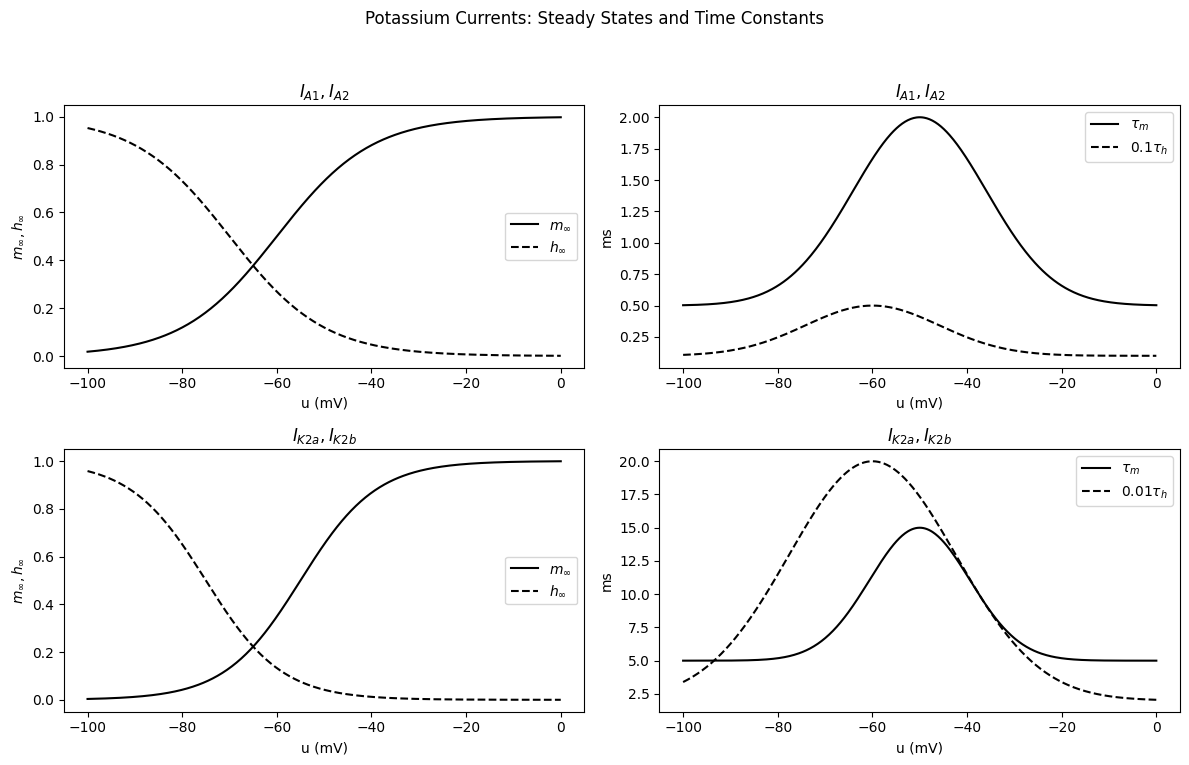

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define membrane potential range
u = np.linspace(-100, 0, 500)

# Functions for IA1 and IA2 (rapidly inactivating K+ currents)
def m_inf_A(u):  # activation
    return 1 / (1 + np.exp(-(u + 60)/10))

def h_inf_A(u):  # inactivation
    return 1 / (1 + np.exp((u + 70)/10))

def tau_m_A(u):
    return 0.5 + 1.5 * np.exp(-((u + 50)/20)**2)  # ms

def tau_h_A(u):
    return 1 + 4 * np.exp(-((u + 60)/20)**2)  # ms

# Functions for IK2a and IK2b (slowly inactivating K+ currents)
def m_inf_K2(u):
    return 1 / (1 + np.exp(-(u + 55)/8))

def h_inf_K2(u):
    return 1 / (1 + np.exp((u + 75)/8))

def tau_m_K2(u):
    return 5 + 10 * np.exp(-((u + 50)/15)**2)  # ms

def tau_h_K2(u):
    return 200 + 1800 * np.exp(-((u + 60)/25)**2)  # ms

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Potassium Currents: Steady States and Time Constants")

# IA1, IA2 steady-state
axs[0, 0].plot(u, m_inf_A(u), label='$m_\\infty$', color='black')
axs[0, 0].plot(u, h_inf_A(u), label='$h_\\infty$', color='black', linestyle='--')
axs[0, 0].set_title('$I_{A1}, I_{A2}$')
axs[0, 0].set_ylabel('$m_\\infty, h_\\infty$')
axs[0, 0].set_xlabel('u (mV)')
axs[0, 0].legend()

# IA1, IA2 time constants
axs[0, 1].plot(u, tau_m_A(u), label='$\\tau_m$', color='black')
axs[0, 1].plot(u, 0.1 * tau_h_A(u), label='$0.1 \\tau_h$', color='black', linestyle='--')
axs[0, 1].set_title('$I_{A1}, I_{A2}$')
axs[0, 1].set_ylabel('ms')
axs[0, 1].set_xlabel('u (mV)')
axs[0, 1].legend()

# IK2a, IK2b steady-state
axs[1, 0].plot(u, m_inf_K2(u), label='$m_\\infty$', color='black')
axs[1, 0].plot(u, h_inf_K2(u), label='$h_\\infty$', color='black', linestyle='--')
axs[1, 0].set_title('$I_{K2a}, I_{K2b}$')
axs[1, 0].set_ylabel('$m_\\infty, h_\\infty$')
axs[1, 0].set_xlabel('u (mV)')
axs[1, 0].legend()

# IK2a, IK2b time constants
axs[1, 1].plot(u, tau_m_K2(u), label='$\\tau_m$', color='black')
axs[1, 1].plot(u, 0.01 * tau_h_K2(u), label='$0.01 \\tau_h$', color='black', linestyle='--')
axs[1, 1].set_title('$I_{K2a}, I_{K2b}$')
axs[1, 1].set_ylabel('ms')
axs[1, 1].set_xlabel('u (mV)')
axs[1, 1].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
